# Question 5

In [8]:
import os
import pandas as pd
FILE_ID = "1C7xK9RZ5pAHvueLWS21tXRS-pUTr6a5M"
OUT_PATH = "train.csv"

if not os.path.exists(OUT_PATH):
    !gdown --id {FILE_ID} -O {OUT_PATH}
else:
    print("train.csv already exists.")

df = pd.read_csv(OUT_PATH)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


train.csv already exists.
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.copy()

y = data["Survived"]
X = data.drop(columns=["Survived"], errors="ignore")

drop_cols = ["Name", "Ticket", "Cabin"]
X = X.drop(columns=[c for c in drop_cols if c in X.columns], errors="ignore")

for col in ["Age", "Fare"]:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

if "Embarked" in X.columns:
    X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

for col in ["Pclass", "SibSp", "Parch"]:
    if col in X.columns and X[col].isna().any():
        X[col] = X[col].fillna(X[col].median())

cat_cols = [c for c in ["Sex", "Embarked"] if c in X.columns]
X = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred  = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc  = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")

print("Number of nodes:", clf.tree_.node_count)
print("Tree depth:", clf.tree_.max_depth)


Train Accuracy: 0.8413
Test  Accuracy: 0.7821
Number of nodes: 29
Tree depth: 4


# Question 6

## الف

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.copy()

y = data["Survived"]

X = data.drop(columns=["Survived"], errors="ignore")

drop_cols = ["Name", "Ticket", "Cabin"]
X = X.drop(columns=[c for c in drop_cols if c in X.columns], errors="ignore")

for col in ["Age", "Fare"]:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

if "Embarked" in X.columns:
    X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

cat_cols = [c for c in ["Sex", "Embarked"] if c in X.columns]
X = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf_full = DecisionTreeClassifier(max_depth=None, random_state=42)
clf_full.fit(X_train, y_train)

train_pred = clf_full.predict(X_train)
test_pred  = clf_full.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc  = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")

print("Number of nodes:", clf_full.tree_.node_count)
print("Tree depth:", clf_full.tree_.max_depth)


Train Accuracy: 1.0000
Test  Accuracy: 0.7039
Number of nodes: 269
Tree depth: 25


## ب

  max_depth  train_acc  test_acc  nodes  depth
0         3   0.832865  0.782123     15      3
1         5   0.856742  0.731844     47      5
2        10   0.933989  0.787709    153     10
3      None   1.000000  0.703911    269     25


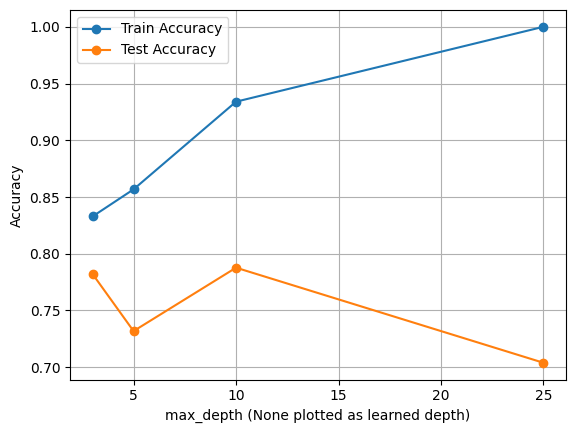

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.copy()

y = data["Survived"]
X = data.drop(columns=["Survived"], errors="ignore")

drop_cols = ["Name", "Ticket", "Cabin"]
X = X.drop(columns=[c for c in drop_cols if c in X.columns], errors="ignore")

for col in ["Age", "Fare"]:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

if "Embarked" in X.columns:
    X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

cat_cols = [c for c in ["Sex", "Embarked"] if c in X.columns]
X = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

depths = [3, 5, 10, None]
results = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc  = accuracy_score(y_test,  clf.predict(X_test))

    results.append({
        "max_depth": "None" if d is None else d,
        "train_acc": train_acc,
        "test_acc": test_acc,
        "nodes": clf.tree_.node_count,
        "depth": clf.tree_.max_depth
    })

results_df = pd.DataFrame(results)
print(results_df)


plot_x = []
for v in results_df["max_depth"]:
    if v == "None":
        plot_x.append(results_df.loc[results_df["max_depth"]=="None", "depth"].values[0])
    else:
        plot_x.append(int(v))

plt.figure()
plt.plot(plot_x, results_df["train_acc"], marker="o", label="Train Accuracy")
plt.plot(plot_x, results_df["test_acc"], marker="o", label="Test Accuracy")
plt.xlabel("max_depth (None plotted as learned depth)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


## ج

Baselines:
    model max_depth  ccp_alpha  train_acc  test_acc  nodes  depth
0  depth4         4        0.0   0.841292  0.782123     29      4
1    full      None        0.0   1.000000  0.703911    269     25

Number of positive alphas: 47
First few alphas: [0.00091349 0.00092505 0.00105337 0.00109238 0.0011236  0.00117041
 0.00120385 0.00120385 0.00122893 0.00129646]

Pruning results (head):
   ccp_alpha  train_acc  test_acc  nodes  depth
0   0.000913   0.998596  0.703911    263     25
1   0.000925   0.997191  0.709497    257     25
2   0.001053   0.991573  0.715084    245     25
3   0.001092   0.988764  0.715084    237     25
4   0.001124   0.987360  0.715084    233     25


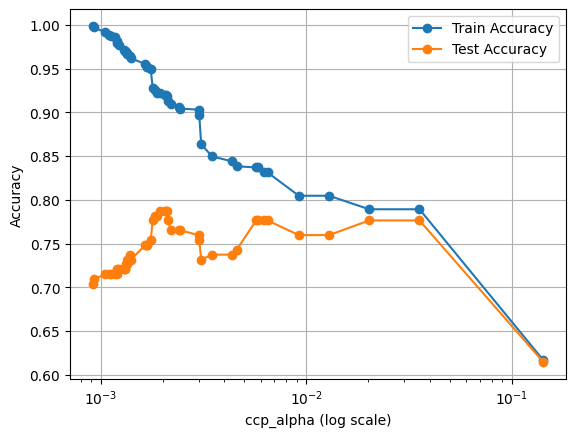


Best test acc among pruned: 0.7877094972067039
Chosen alpha (within tol): 0.002106741573033708
Chosen model metrics:
ccp_alpha     0.002107
train_acc     0.918539
test_acc      0.787709
nodes        77.000000
depth        14.000000
Name: 27, dtype: float64

Final chosen pruned model:
ccp_alpha: 0.002106741573033708
Train Accuracy: 0.9185
Test  Accuracy: 0.7877
Number of nodes: 77
Tree depth: 14


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df.copy()

y = data["Survived"]
X = data.drop(columns=["Survived"], errors="ignore")

drop_cols = ["Name", "Ticket", "Cabin"]
X = X.drop(columns=[c for c in drop_cols if c in X.columns], errors="ignore")

for col in ["Age", "Fare"]:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

if "Embarked" in X.columns:
    X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

cat_cols = [c for c in ["Sex", "Embarked"] if c in X.columns]
X = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf_depth4 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_depth4.fit(X_train, y_train)

clf_full = DecisionTreeClassifier(max_depth=None, random_state=42)
clf_full.fit(X_train, y_train)

baseline = {
    "model": ["depth4", "full"],
    "max_depth": [4, "None"],
    "ccp_alpha": [0.0, 0.0],
    "train_acc": [
        accuracy_score(y_train, clf_depth4.predict(X_train)),
        accuracy_score(y_train, clf_full.predict(X_train)),
    ],
    "test_acc": [
        accuracy_score(y_test, clf_depth4.predict(X_test)),
        accuracy_score(y_test, clf_full.predict(X_test)),
    ],
    "nodes": [clf_depth4.tree_.node_count, clf_full.tree_.node_count],
    "depth": [clf_depth4.tree_.max_depth, clf_full.tree_.max_depth],
}
baseline_df = pd.DataFrame(baseline)
print("Baselines:")
print(baseline_df)

path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

ccp_alphas = np.unique(ccp_alphas)
ccp_alphas = ccp_alphas[ccp_alphas > 0]

print("\nNumber of positive alphas:", len(ccp_alphas))
print("First few alphas:", ccp_alphas[:10])

rows = []
for a in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=a)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc  = accuracy_score(y_test,  clf.predict(X_test))

    rows.append({
        "ccp_alpha": a,
        "train_acc": train_acc,
        "test_acc": test_acc,
        "nodes": clf.tree_.node_count,
        "depth": clf.tree_.max_depth
    })

prune_df = pd.DataFrame(rows).sort_values("ccp_alpha").reset_index(drop=True)
print("\nPruning results (head):")
print(prune_df.head())

plt.figure()
plt.plot(prune_df["ccp_alpha"], prune_df["train_acc"], marker="o", label="Train Accuracy")
plt.plot(prune_df["ccp_alpha"], prune_df["test_acc"], marker="o", label="Test Accuracy")
plt.xscale("log")
plt.xlabel("ccp_alpha (log scale)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

best_test = prune_df["test_acc"].max()
candidates = prune_df[prune_df["test_acc"] >= best_test - tol].copy()
candidates = candidates.sort_values(["nodes", "ccp_alpha"], ascending=[True, True])

best_row = candidates.iloc[0]
best_alpha = best_row["ccp_alpha"]

print("\nBest test acc among pruned:", best_test)
print("Chosen alpha (within tol):", best_alpha)
print("Chosen model metrics:")
print(best_row)

clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)

print("\nFinal chosen pruned model:")
print(f"ccp_alpha: {best_alpha}")
print(f"Train Accuracy: {accuracy_score(y_train, clf_pruned.predict(X_train)):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test,  clf_pruned.predict(X_test)):.4f}")
print("Number of nodes:", clf_pruned.tree_.node_count)
print("Tree depth:", clf_pruned.tree_.max_depth)


# Question 12

In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


def eval_model(model, name: str):
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc  = accuracy_score(y_test,  model.predict(X_test))
    print(f"{name}")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test  Accuracy: {test_acc:.4f}")
    print(f"  Gap (Train-Test): {(train_acc - test_acc):.4f}\n")
    return train_acc, test_acc

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_train_acc, rf_test_acc = eval_model(rf, "RandomForestClassifier (n_estimators=200)")

gb = GradientBoostingClassifier(
    random_state=42
)
gb_train_acc, gb_test_acc = eval_model(gb, "GradientBoostingClassifier")

results_df = pd.DataFrame([
    {"Model": "RandomForest (200)", "Train Acc": rf_train_acc, "Test Acc": rf_test_acc, "Gap": rf_train_acc - rf_test_acc},
    {"Model": "GradientBoosting",   "Train Acc": gb_train_acc, "Test Acc": gb_test_acc, "Gap": gb_train_acc - gb_test_acc},
])

print(results_df)


RandomForestClassifier (n_estimators=200)
  Train Accuracy: 1.0000
  Test  Accuracy: 0.7989
  Gap (Train-Test): 0.2011

GradientBoostingClassifier
  Train Accuracy: 0.9199
  Test  Accuracy: 0.7933
  Gap (Train-Test): 0.1266

                Model  Train Acc  Test Acc       Gap
0  RandomForest (200)   1.000000  0.798883  0.201117
1    GradientBoosting   0.919944  0.793296  0.126648
